<a href="https://colab.research.google.com/github/kimsh519/ms-ai-school/blob/main/0424review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np #numpy를 np로 import
import pandas as pd #pd로 import
import sklearn
import matplotlib.pyplot as plt

import os
from os.path import join
import warnings
warnings.filterwarnings('ignore')

In [107]:
Iris_path = join('.','Iris.txt')
column_path = join('.','Iris_attributes.txt')
# epl data 불러오기

Iris_columns = list() #epl_columns 라는 list 생성
for l in open(column_path) :
  Iris_columns.append(l.strip()) #coulmns_path에 epl_columns data 적용
#print(epl_columns)

# pandas를 이용하여 epl 데이터를 읽어온다
data = pd.read_csv(Iris_path,header = None,names = Iris_columns)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,A
1,2,4.9,3.0,1.4,0.2,Iris-setosa,A
2,3,4.7,3.2,1.3,0.2,Iris-setosa,A
3,4,4.6,3.1,1.5,0.2,Iris-setosa,A
4,5,5.0,3.6,1.4,0.2,Iris-setosa,A
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,C
146,147,6.3,2.5,5.0,1.9,Iris-virginica,C
147,148,6.5,3.0,5.2,2.0,Iris-virginica,C
148,149,6.2,3.4,5.4,2.3,Iris-virginica,C


In [108]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,A
1,2,4.9,3.0,1.4,0.2,Iris-setosa,A
2,3,4.7,3.2,1.3,0.2,Iris-setosa,A
3,4,4.6,3.1,1.5,0.2,Iris-setosa,A
4,5,5.0,3.6,1.4,0.2,Iris-setosa,A


In [109]:
data.shape

(150, 7)

In [110]:
label = data['Species']
del data['Species']
del data['SpeciesCode']
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [111]:
data.describe() #data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [113]:
from sklearn.preprocessing import MinMaxScaler
scalermm = MinMaxScaler()
data2 = scalermm.fit_transform(data) #data scaling

In [114]:
scalermm_data = pd.DataFrame(data2, columns = data.columns)
scalermm_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667
146,0.979866,0.555556,0.208333,0.677966,0.750000
147,0.986577,0.611111,0.416667,0.711864,0.791667
148,0.993289,0.527778,0.583333,0.745763,0.916667


In [115]:
# SMOTE
from imblearn.over_sampling import SMOTE #SMOTE 기능 불러오기
smote = SMOTE(k_neighbors = 5)
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, 
                                  n_features=2, 
                                  n_informative=2,
                                  n_redundant=0,
                                  n_repeated=0,
                                  n_classes=3,
                                  n_clusters_per_class=1,
                                  weights=[0.1,0.2,0.8],
                                  class_sep=0.8,
                                  random_state=2023)

Text(0.5, 1.0, 'Before smote')

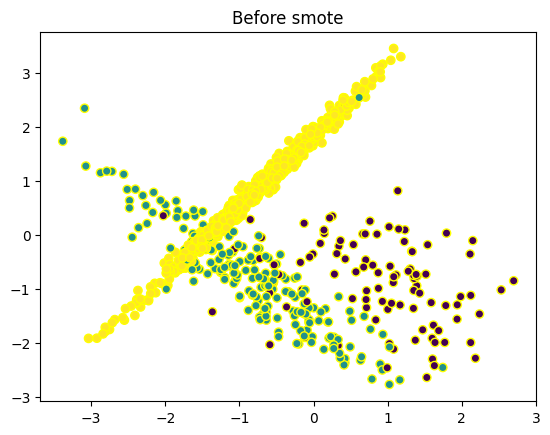

In [116]:
fig = plt.Figure(figsize = (14,8))
plt.scatter(data[:,0],data[:,1],c=label,linewidth=1,edgecolor='yellow')
plt.title('Before smote')

In [117]:
smoted_data ,smoted_label = smote.fit_resample(data,label)

Text(0.5, 1.0, 'After smote')

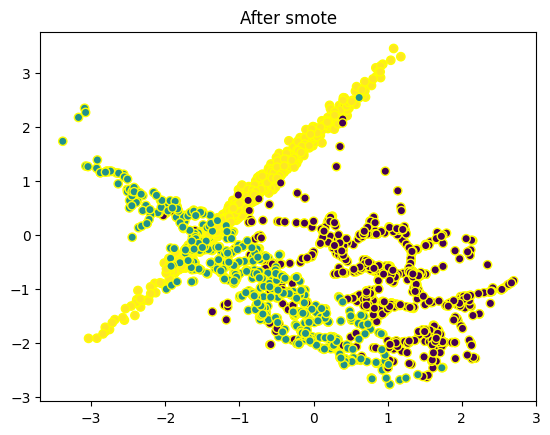

In [118]:
fig = plt.Figure(figsize = (14,8))
plt.scatter(smoted_data[:,0], smoted_data[:,1], c=smoted_label,linewidth=1,edgecolor='yellow')
plt.title('After smote')

In [119]:
#차원 축소
from sklearn.datasets import load_digits
digits = load_digits()

In [120]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [121]:
data = digits.data 
label = digits.target

In [122]:
print(data[0])
print(label[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [123]:
print(data[0].reshape((4,-1)))  # reshape(4,-1)을 좀 더 쉽게 표현

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


Label: 0


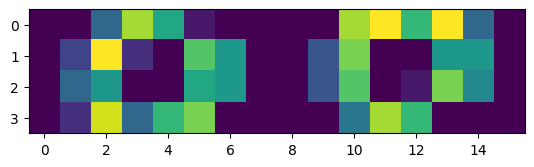

In [124]:
plt.imshow(data[0].reshape((4,-1)))
print('Label: {}'.format(label[0]))

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [126]:
new_data = pca.fit_transform(data)

In [127]:
# 결과 살펴보기 
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA 데이터의 차원 
(1797, 5)


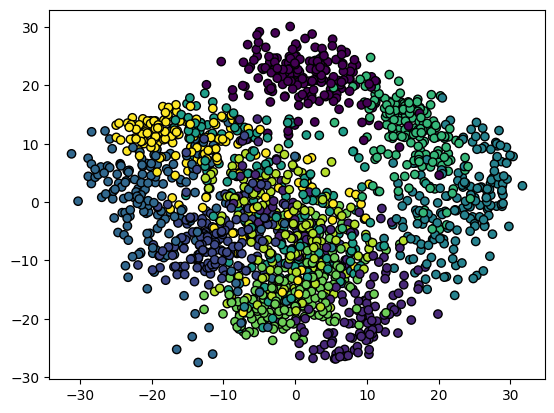

In [128]:
plt.scatter(new_data[:,0],new_data[:,1],c=label, linewidth=1,edgecolor='black')

In [129]:
data = pd.read_csv(Iris_path, header=None, names=Iris_columns)
label = data['Species']
del data
# one-hot Encoding


In [130]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(label.values.reshape((-1, 1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))

columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
print(columns)
result = pd.DataFrame(data = np.concatenate(
                      [label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], 
                      axis=1),columns=columns)
result

['label' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,label,Iris-setosa,Iris-versicolor,Iris-virginica
0,Iris-setosa,1.0,0.0,0.0
1,Iris-setosa,1.0,0.0,0.0
2,Iris-setosa,1.0,0.0,0.0
3,Iris-setosa,1.0,0.0,0.0
4,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...
145,Iris-virginica,0.0,0.0,1.0
146,Iris-virginica,0.0,0.0,1.0
147,Iris-virginica,0.0,0.0,1.0
148,Iris-virginica,0.0,0.0,1.0


In [130]:
#123